In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

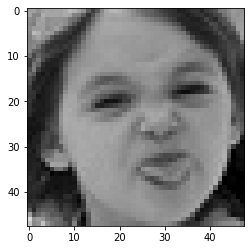

In [2]:
single_img = tf.keras.preprocessing.image.load_img("fer2013/train/Angry/100.jpg")

plt.imshow(single_img)

In [3]:
tf.keras.preprocessing.image.img_to_array(single_img).shape

(48, 48, 3)

In [4]:
train_dir = "fer2013/train/"
val_dir = "fer2013/validation/"

In [5]:
import tensorflow as tf

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_data = data_gen.flow_from_directory(train_dir,
                                         target_size=(48,48),
                                         batch_size= 16,
                                         class_mode="categorical",
                                         shuffle= True)

val_data = val_gen.flow_from_directory(val_dir,
                                       target_size=(48,48),
                                       batch_size= 16,
                                       class_mode="categorical",
                                       shuffle= True
                                      )

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [7]:
labels = list(train_data.class_indices.keys())
labels

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

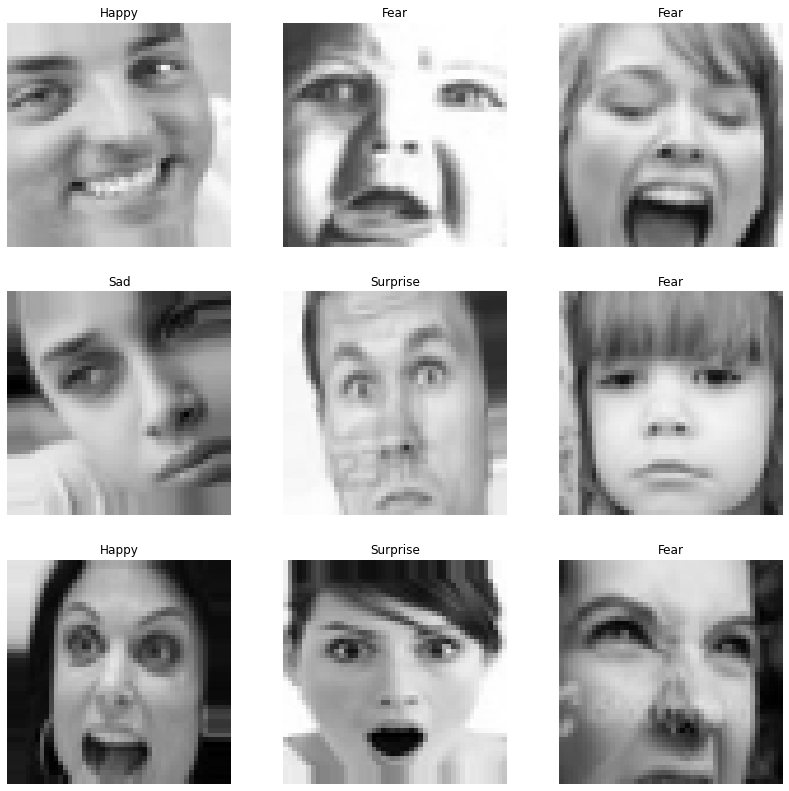

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))

for i in range(9):
    image, label = train_data.next()
    
    plt.subplot(3,3,i+1)
    plt.imshow(image[i])
    plt.title(labels[tf.argmax(label[i])])
    plt.axis("off")



In [51]:
import tensorflow as tf
from tensorflow.keras import layers


model = tf.keras.Sequential([
    layers.Conv2D(filters= 32, kernel_size = (3,3), activation="relu", input_shape=(48,48,3), padding = "same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 32, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters= 64, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 64, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters= 128, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 128, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters= 256, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 256, kernel_size = (3,3), activation= "relu", padding = "same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation= "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation= "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(7, activation="softmax")
    
])

In [52]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_58 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_59 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                     

In [54]:
model.compile(loss= tf.keras.losses.categorical_crossentropy,
             optimizer= tf.keras.optimizers.Adam(),
             metrics =["accuracy"])

In [57]:
model.fit(train_data,
         epochs = 20,
         steps_per_epoch=len(train_data) * 0.1,
         validation_data= val_data,
         validation_steps=len(val_data) * 0.1)

Epoch 1/20
179/179 [==============================] - 76s 410ms/step - loss: 2.2449 - accuracy: 0.1826 - val_loss: 2.0094 - val_accuracy: 0.2011
Epoch 2/20
179/179 [==============================] - 74s 411ms/step - loss: 2.0429 - accuracy: 0.1910 - val_loss: 2.3002 - val_accuracy: 0.2500
Epoch 3/20
179/179 [==============================] - 72s 402ms/step - loss: 1.9248 - accuracy: 0.2174 - val_loss: 1.8751 - val_accuracy: 0.2228
Epoch 4/20
179/179 [==============================] - 64s 359ms/step - loss: 1.8775 - accuracy: 0.2351 - val_loss: 1.8567 - val_accuracy: 0.2283
Epoch 5/20
179/179 [==============================] - 64s 356ms/step - loss: 1.8946 - accuracy: 0.2344 - val_loss: 1.7958 - val_accuracy: 0.2717
Epoch 6/20
179/179 [==============================] - 67s 372ms/step - loss: 1.8156 - accuracy: 0.2576 - val_loss: 1.8153 - val_accuracy: 0.2446
Epoch 7/20
179/179 [==============================] - 66s 366ms/step - loss: 1.8019 - accuracy: 0.2528 - val_loss: 1.7288 - val_ac

In [19]:
import tensorflow as tf
from tensorflow.keras import layers


model_2 = tf.keras.Sequential([
    layers.Conv2D(filters= 32, kernel_size = (3,3), activation="relu", input_shape=(48,48,3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 32, kernel_size = (3,3), activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters= 64, kernel_size = (3,3), activation= "relu"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 64, kernel_size = (3,3), activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
    layers.Conv2D(filters= 128, kernel_size = (3,3), activation= "relu"),
    layers.BatchNormalization(),
    layers.Conv2D(filters= 128, kernel_size = (3,3), activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    
#     layers.Conv2D(filters= 256, kernel_size = (3,3), activation= "relu"),
#     layers.BatchNormalization(),
#     layers.Conv2D(filters= 256, kernel_size = (3,3), activation= "relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation= "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation= "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(7, activation="softmax")
    
])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                        

In [20]:
model_2.compile(loss= tf.keras.losses.categorical_crossentropy,
             optimizer= tf.keras.optimizers.Adam(),
             metrics =["accuracy"])

In [21]:
model_2.fit(train_data,
         epochs = 100,
         steps_per_epoch=len(train_data) * 0.1,
         validation_data= val_data,
         validation_steps=len(val_data) * 0.1)

Epoch 1/100
179/179 [==============================] - 35s 188ms/step - loss: 2.2890 - accuracy: 0.1698 - val_loss: 2.0495 - val_accuracy: 0.1495
Epoch 2/100
179/179 [==============================] - 33s 184ms/step - loss: 2.0076 - accuracy: 0.2087 - val_loss: 1.8519 - val_accuracy: 0.2011
Epoch 3/100
179/179 [==============================] - 32s 178ms/step - loss: 1.9073 - accuracy: 0.2448 - val_loss: 1.8148 - val_accuracy: 0.2609
Epoch 4/100
179/179 [==============================] - 33s 184ms/step - loss: 1.8537 - accuracy: 0.2413 - val_loss: 1.7798 - val_accuracy: 0.2717
Epoch 5/100
179/179 [==============================] - 32s 180ms/step - loss: 1.7871 - accuracy: 0.2778 - val_loss: 1.7921 - val_accuracy: 0.2745
Epoch 6/100
179/179 [==============================] - 31s 171ms/step - loss: 1.7704 - accuracy: 0.2927 - val_loss: 1.7724 - val_accuracy: 0.2826
Epoch 7/100
179/179 [==============================] - 31s 171ms/step - loss: 1.7296 - accuracy: 0.3156 - val_loss: 1.6975 -

Epoch 57/100
179/179 [==============================] - 31s 170ms/step - loss: 1.2831 - accuracy: 0.5139 - val_loss: 1.5355 - val_accuracy: 0.4592
Epoch 58/100
179/179 [==============================] - 31s 170ms/step - loss: 1.2732 - accuracy: 0.5233 - val_loss: 1.4077 - val_accuracy: 0.4728
Epoch 59/100
179/179 [==============================] - 30s 169ms/step - loss: 1.2521 - accuracy: 0.5188 - val_loss: 1.6692 - val_accuracy: 0.4321
Epoch 60/100
179/179 [==============================] - 31s 170ms/step - loss: 1.2582 - accuracy: 0.5271 - val_loss: 1.3462 - val_accuracy: 0.5326
Epoch 61/100
179/179 [==============================] - 29s 163ms/step - loss: 1.2748 - accuracy: 0.5260 - val_loss: 1.4715 - val_accuracy: 0.4918
Epoch 62/100
179/179 [==============================] - 29s 161ms/step - loss: 1.2727 - accuracy: 0.5142 - val_loss: 1.3771 - val_accuracy: 0.5272
Epoch 63/100
179/179 [==============================] - 29s 161ms/step - loss: 1.2326 - accuracy: 0.5375 - val_loss: 1

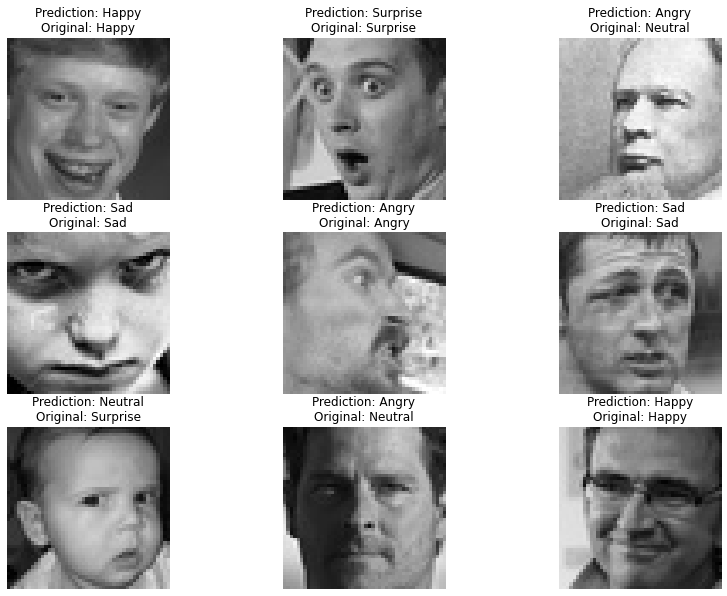

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(14,14))

for i in range(9):
  image,label = val_data.next()
  res_model_pred = model_2.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(res_model_pred[i])]}\nOriginal: {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

In [9]:
model_2.save("emotion_classifaction.h5")

NameError: name 'model_2' is not defined

In [10]:
model_load = tf.keras.models.load_model("emotion_classifaction.h5")

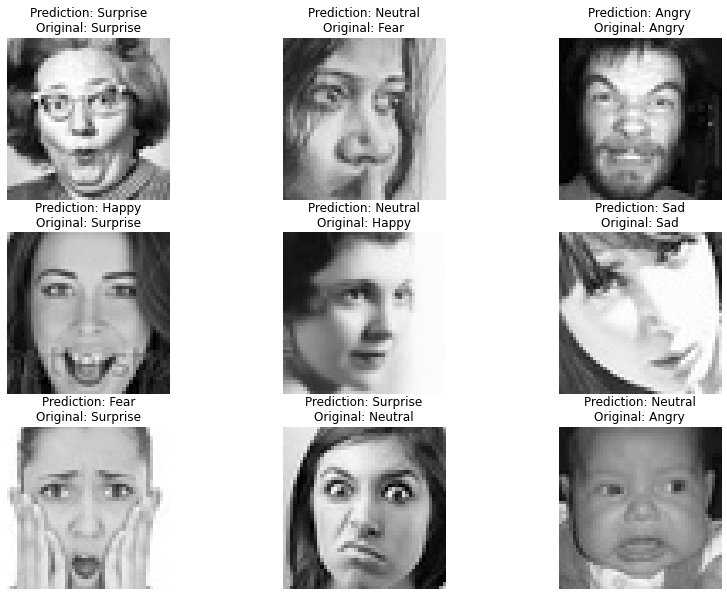

In [11]:
plt.figure(figsize=(14,14))

for i in range(9):
  image,label = val_data.next()
  res_model_pred = model_load.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(res_model_pred[i])]}\nOriginal: {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

In [47]:
def image_show(image, size, title):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    color_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(aspect_ratio * size, size))
    plt.imshow(color_img)
    plt.title(title)
    plt.show()

In [12]:
face_detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")

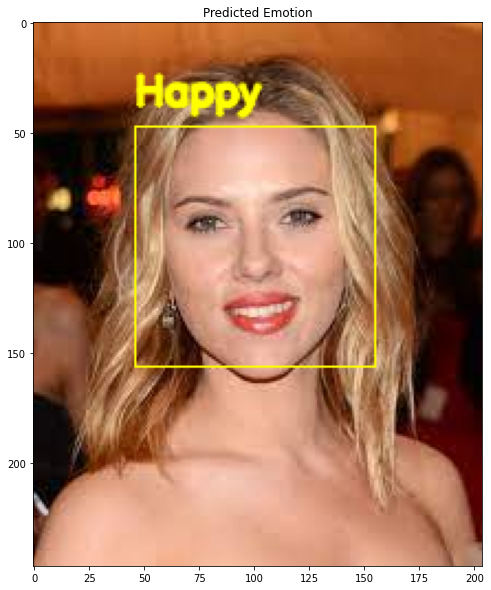

In [54]:
image = cv2.imread("images/scarlett_Johansson.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_detector.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),1)
    img = image[y:y +h, x:x +w]
    img = cv2.resize(img,(48,48))
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model_load.predict(img)
    cv2.putText(image, labels[np.argmax(prediction)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,255), 2, cv2.LINE_AA)
image_show(image, 10, "Predicted Emotion")

In [60]:
def emotions_predction(image, size):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml")
    faces = face_detector.detectMultiScale(gray)
    
    for (x,y,w,h) in faces:
        
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,255),1)
        img = image[y:y +h, x:x +w]
        img = cv2.resize(img,(48,48))
        img = img/255
        img = np.expand_dims(img, axis=0)
        prediction = model_load.predict(img)
        cv2.putText(image, labels[np.argmax(prediction)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,255), 2, cv2.LINE_AA)
    
    return image_show(image, size, "Predicted Image")
    

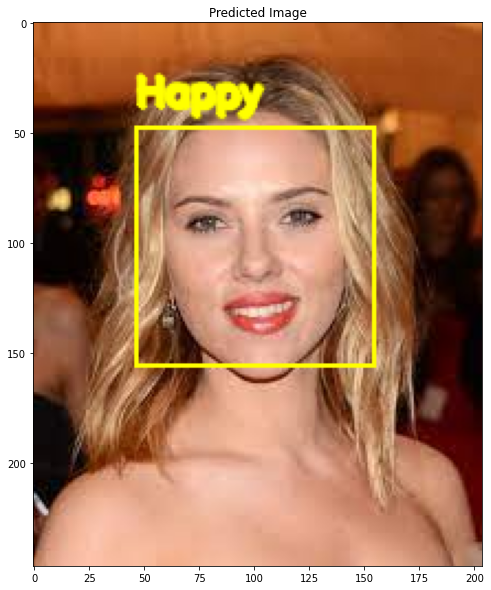

In [56]:
emotions_predction(image)

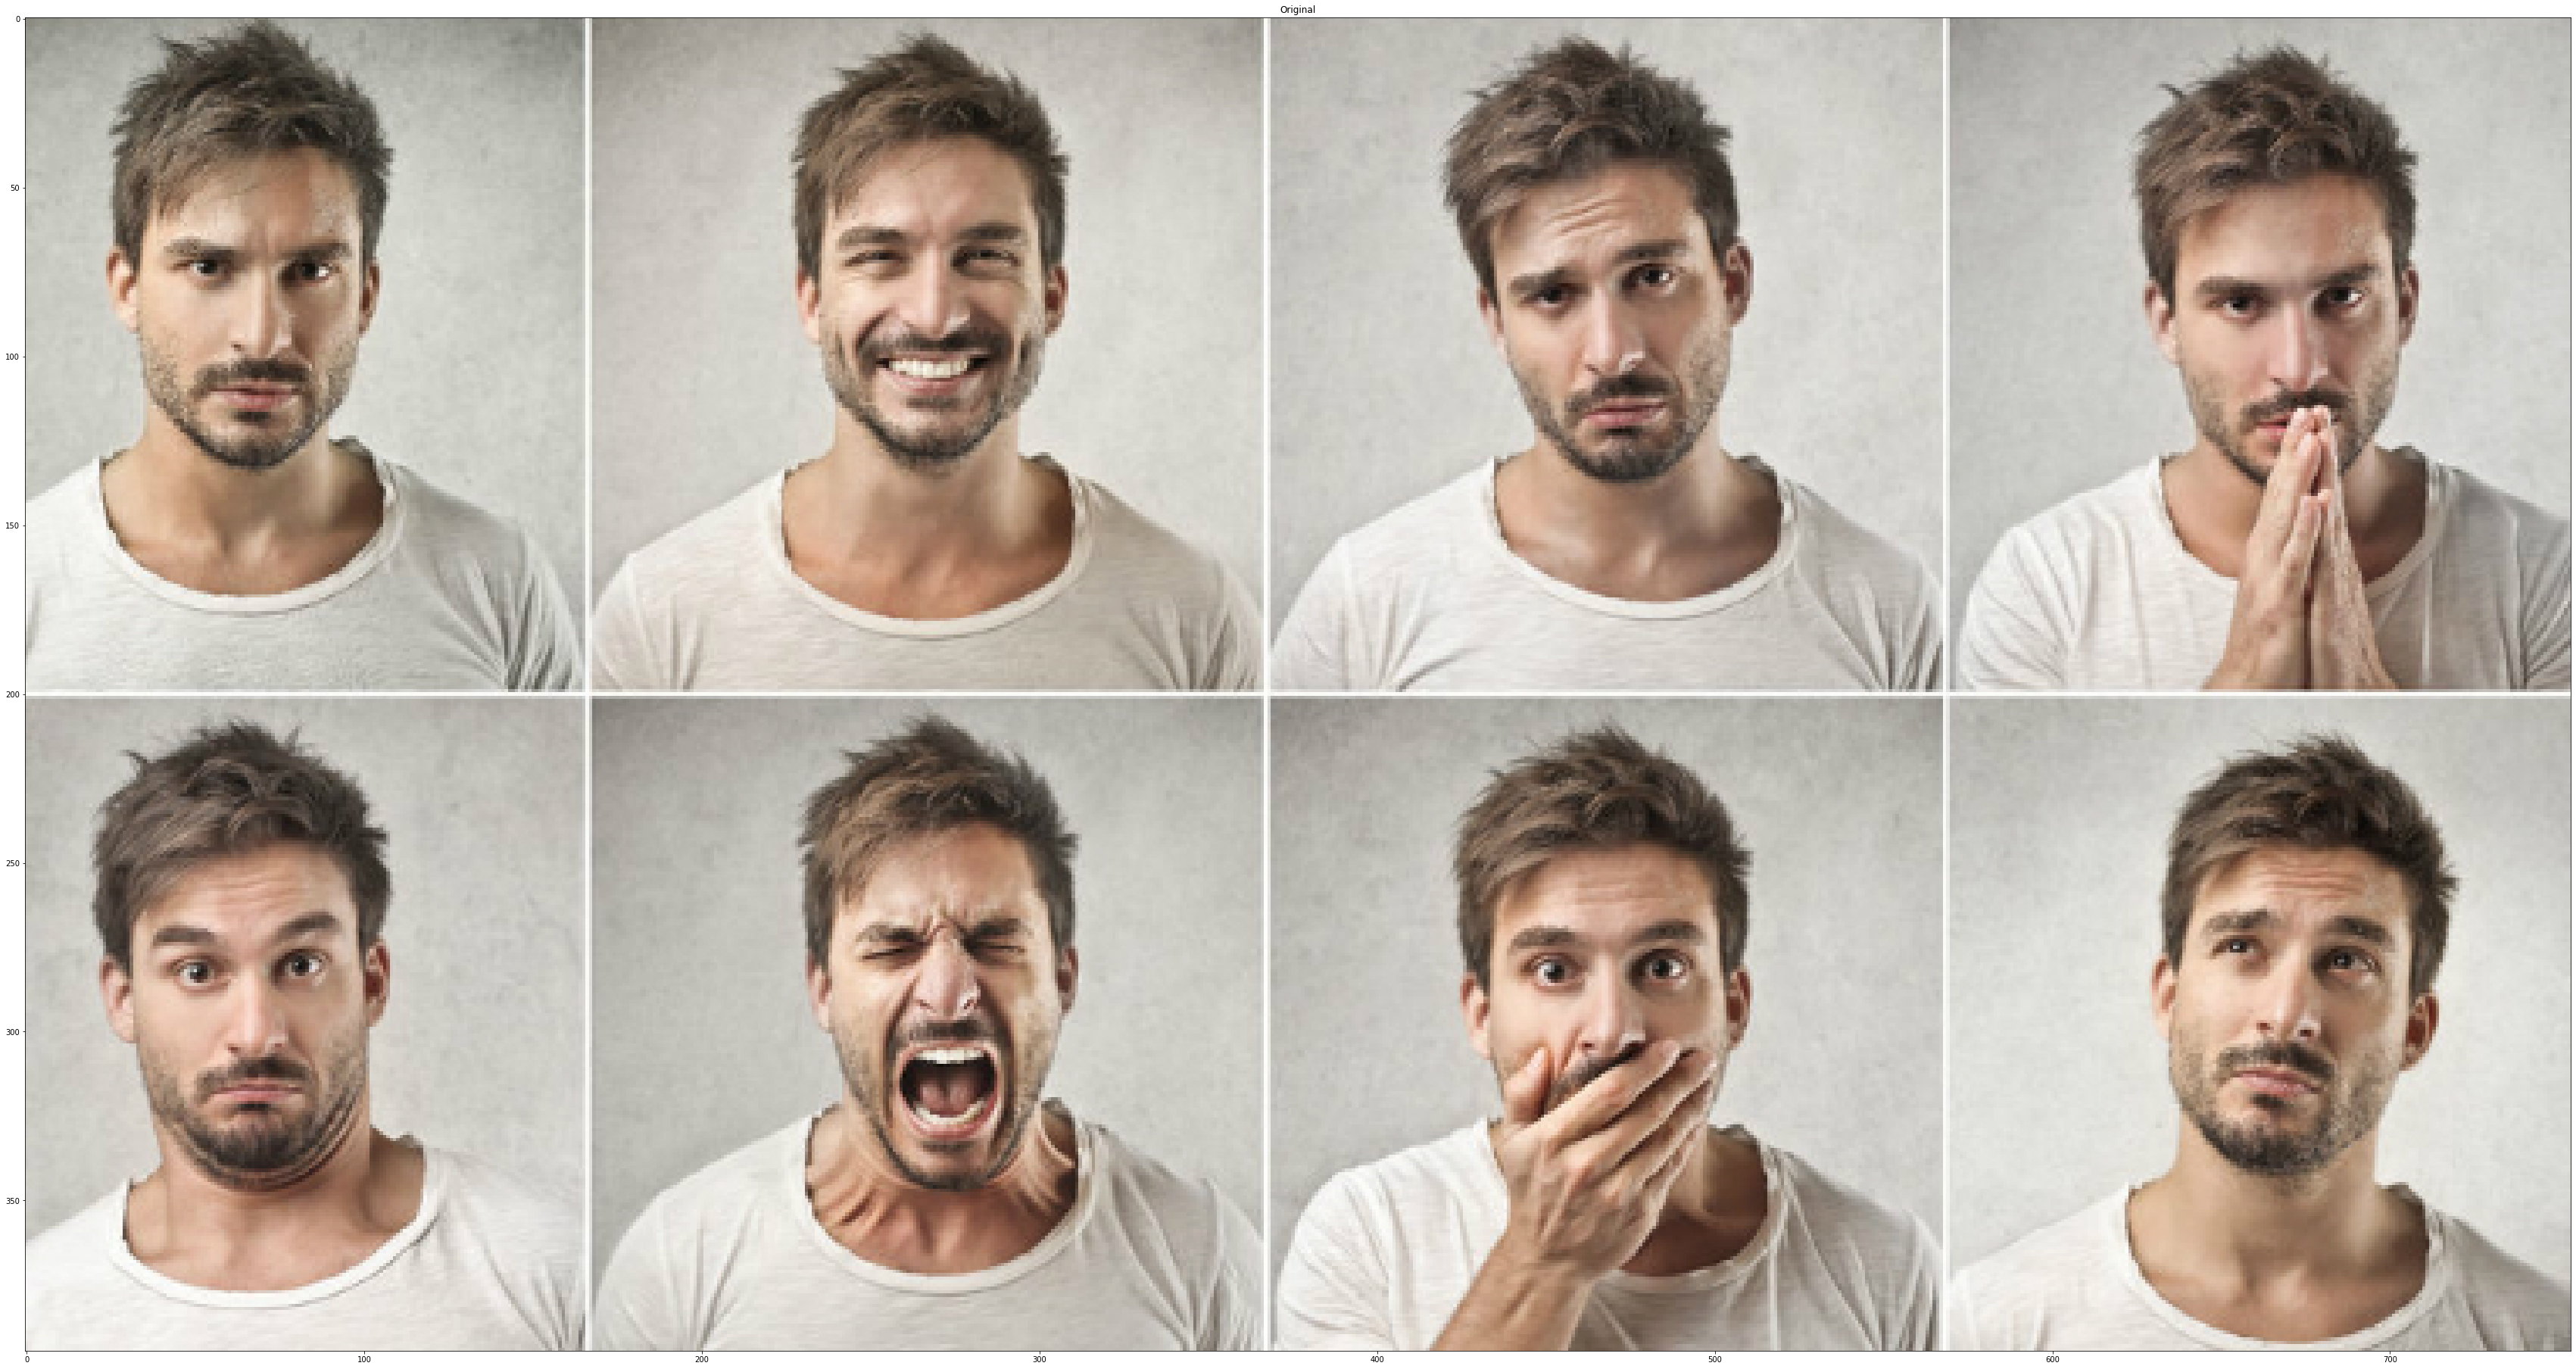

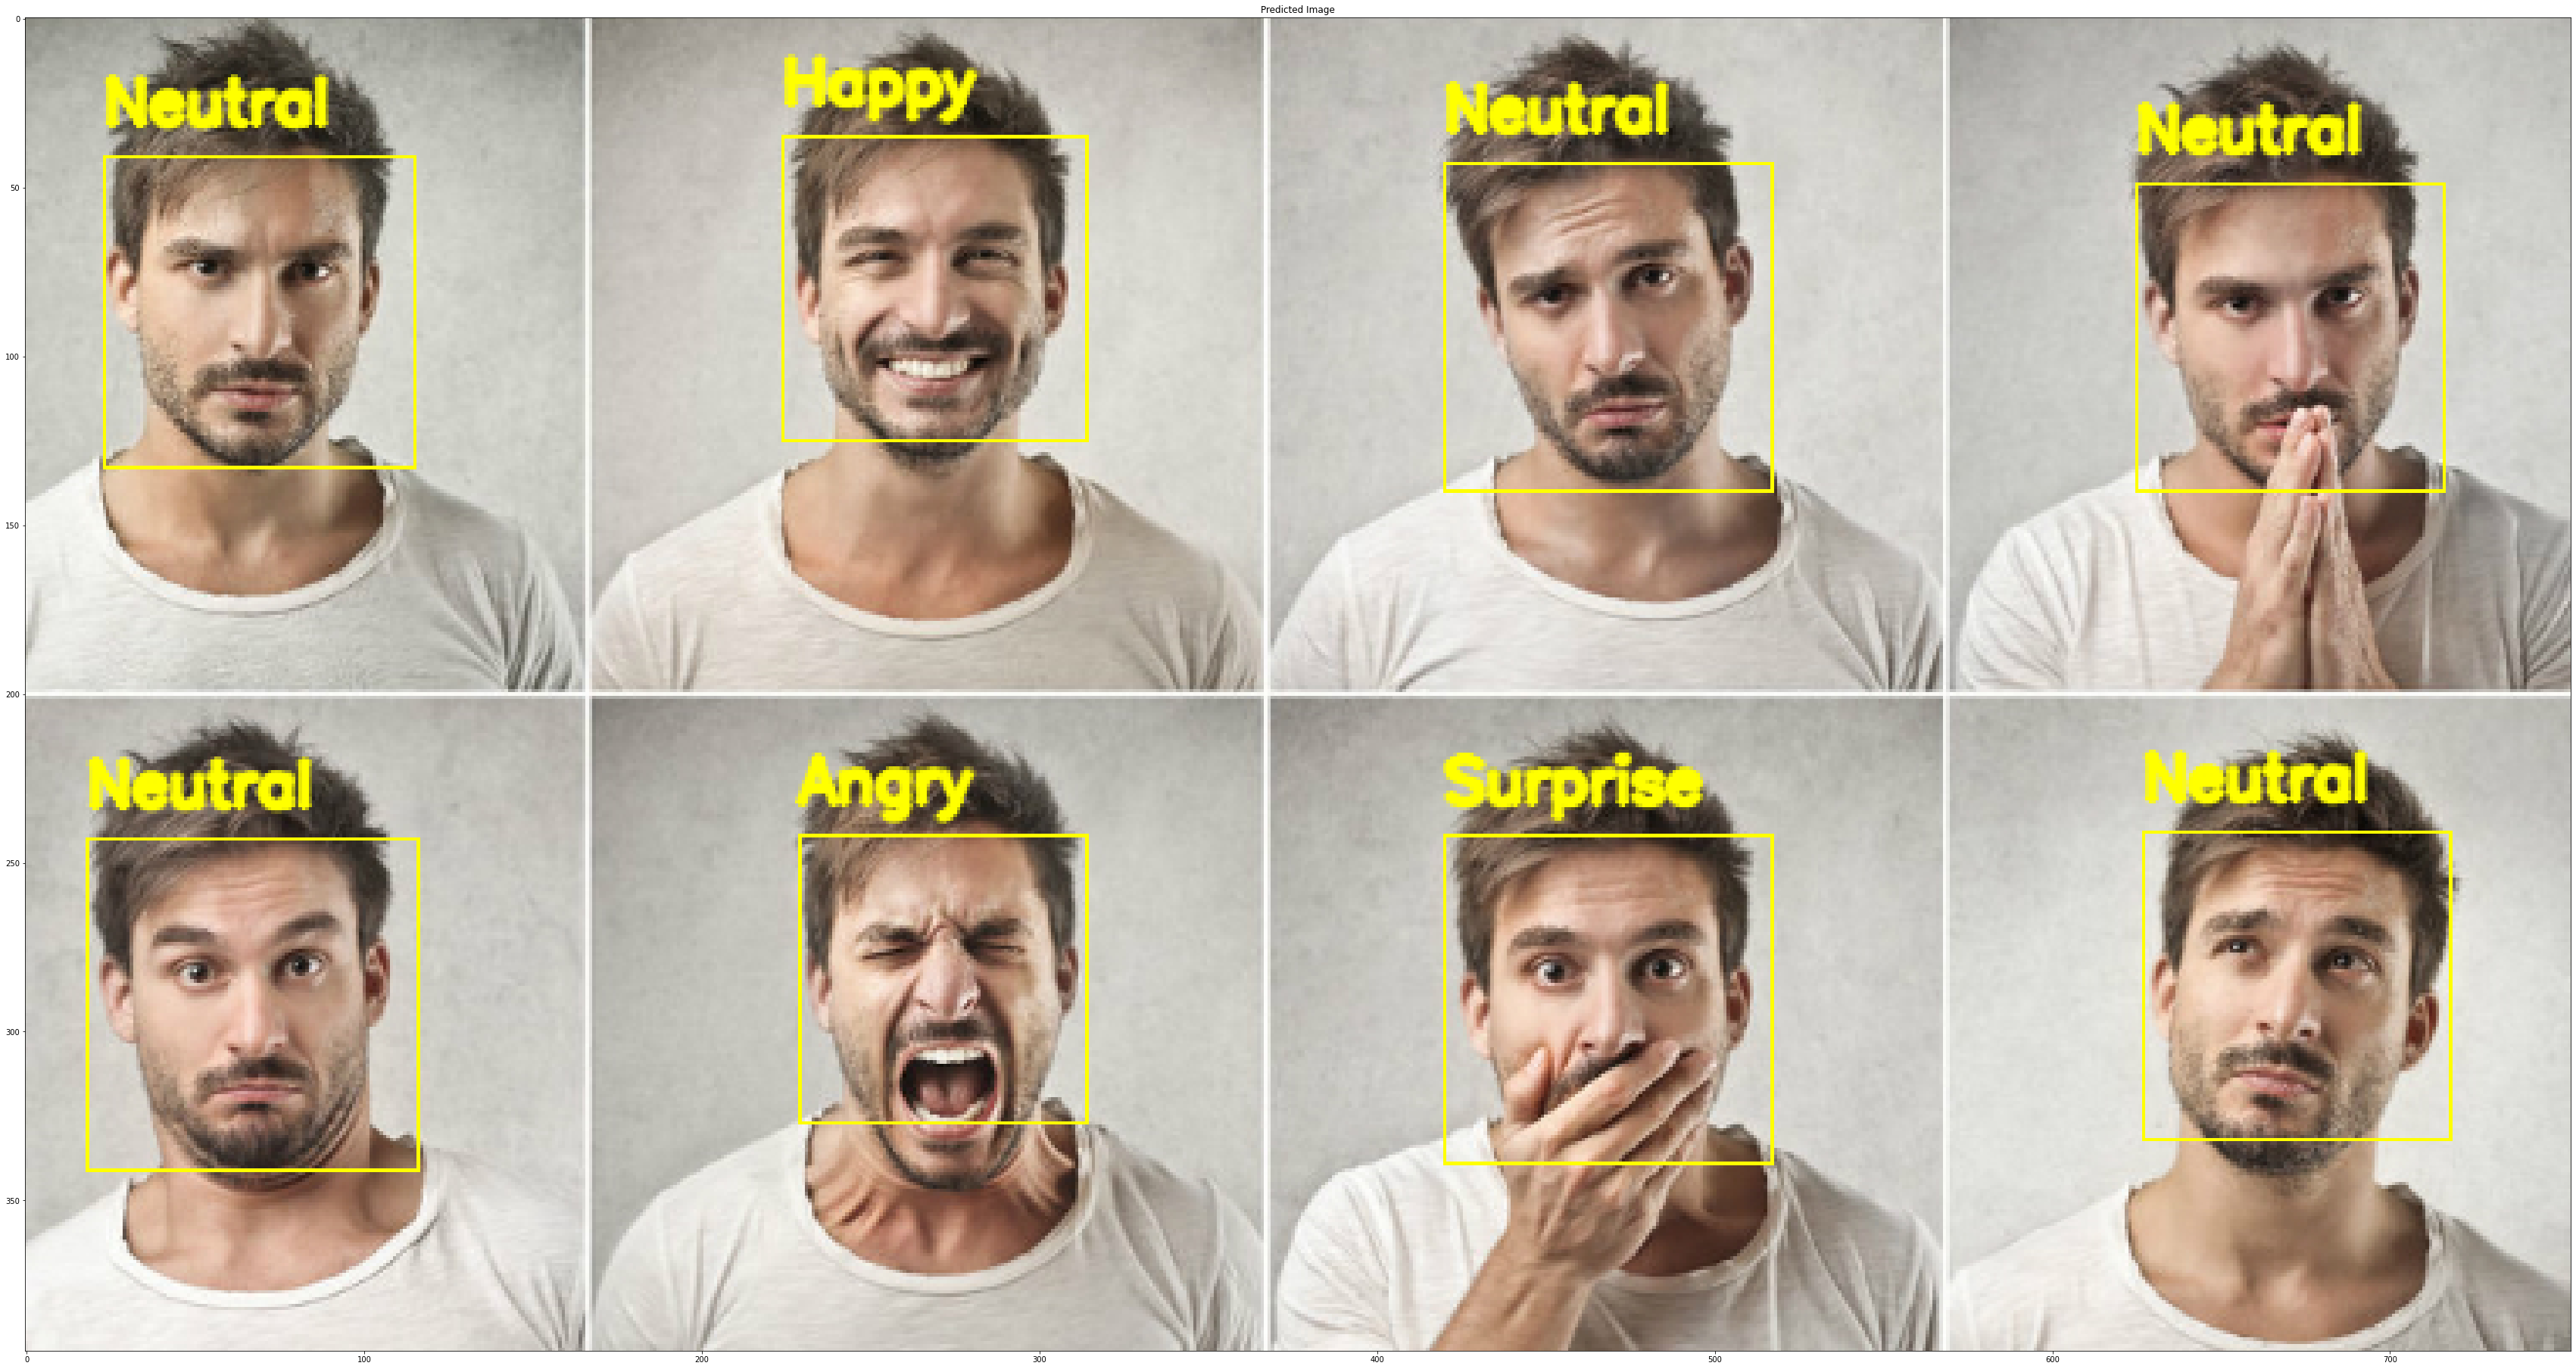

In [61]:
image = cv2.imread("images/faces_emotions.png")
image_show(image, 115, "Original")
emotions_predction(image, 115)